In [5]:
from pathlib import Path
import copy
from itertools import product
import numpy as np


def append_data(
    data,
    rho_cc=None,
    weights=None,
    exc_over_dm_cc_grids=None,
    hf_over_dm_cc_grids=None,
    slater_cc_grids=None,
    b88_cc_grids=None,
    lyp_cc_grids=None,
    vwn_cc_grids=None,
    pbex_cc_grids=None,
    pbec_cc_grids=None,
    scan_cc_grids=None,
    p86_cc_grids=None,
):
    if rho_cc is not None:
        rho_cc = np.append(rho_cc, data["rho_cc"], axis=0)
    else:
        rho_cc = data["rho_cc"]

    if weights is not None:
        weights = np.append(weights, data["weights"], axis=0)
    else:
        weights = data["weights"]

    if exc_over_dm_cc_grids is not None:
        exc_over_dm_cc_grids = np.append(
            exc_over_dm_cc_grids, data["exc_over_dm_cc_grids"], axis=0
        )
    else:
        exc_over_dm_cc_grids = data["exc_over_dm_cc_grids"]

    if hf_over_dm_cc_grids is not None:
        hf_over_dm_cc_grids = np.append(
            hf_over_dm_cc_grids, -data["hf_over_dm_cc_grids"], axis=0
        )
    else:
        hf_over_dm_cc_grids = -data["hf_over_dm_cc_grids"]

    if slater_cc_grids is not None:
        slater_cc_grids = np.append(slater_cc_grids, data["slater_cc_grids"], axis=0)
    else:
        slater_cc_grids = data["slater_cc_grids"]

    if b88_cc_grids is not None:
        b88_cc_grids = np.append(b88_cc_grids, data["b88_cc_grids"], axis=0)
    else:
        b88_cc_grids = data["b88_cc_grids"]

    if lyp_cc_grids is not None:
        lyp_cc_grids = np.append(lyp_cc_grids, data["lyp_cc_grids"], axis=0)
    else:
        lyp_cc_grids = data["lyp_cc_grids"]

    if vwn_cc_grids is not None:
        vwn_cc_grids = np.append(vwn_cc_grids, data["vwn_cc_grids"], axis=0)
    else:
        vwn_cc_grids = data["vwn_cc_grids"]

    if pbex_cc_grids is not None:
        pbex_cc_grids = np.append(pbex_cc_grids, data["pbex_cc_grids"], axis=0)
    else:
        pbex_cc_grids = data["pbex_cc_grids"]

    if pbec_cc_grids is not None:
        pbec_cc_grids = np.append(pbec_cc_grids, data["pbec_cc_grids"], axis=0)
    else:
        pbec_cc_grids = data["pbec_cc_grids"]

    if scan_cc_grids is not None:
        scan_cc_grids = np.append(scan_cc_grids, data["scan_cc_grids"], axis=0)
    else:
        scan_cc_grids = data["scan_cc_grids"]

    if p86_cc_grids is not None:
        p86_cc_grids = np.append(p86_cc_grids, data["p86_cc_grids"], axis=0)
    else:
        p86_cc_grids = data["p86_cc_grids"]

    return (
        rho_cc,
        weights,
        exc_over_dm_cc_grids,
        hf_over_dm_cc_grids,
        slater_cc_grids,
        b88_cc_grids,
        lyp_cc_grids,
        vwn_cc_grids,
        pbex_cc_grids,
        pbec_cc_grids,
        scan_cc_grids,
        p86_cc_grids,
    )


(
    rho_cc,
    weights,
    exc_over_dm_cc_grids,
    hf_over_dm_cc_grids,
    slater_cc_grids,
    b88_cc_grids,
    lyp_cc_grids,
    vwn_cc_grids,
    pbex_cc_grids,
    pbec_cc_grids,
    scan_cc_grids,
    p86_cc_grids,
) = (
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
    None,
)

for file_path_i in [
    "data/grids/data_Methane_0_1_-0.5000.npz",
    "data/grids/data_Methane_0_1_0.0000.npz",
    "data/grids/data_Methane_0_1_0.5000.npz",
    "data/grids/data_Ethane_0_1_-0.5000.npz",
    "data/grids/data_Ethane_0_1_0.0000.npz",
    "data/grids/data_Ethane_0_1_0.5000.npz",
    "data/grids/data_Ethylene_0_1_-0.5000.npz",
    "data/grids/data_Ethylene_0_1_0.0000.npz",
    "data/grids/data_Ethylene_0_1_0.5000.npz",
    "data/grids/data_Acetylene_0_1_-0.5000.npz",
    "data/grids/data_Acetylene_0_1_0.0000.npz",
    "data/grids/data_Acetylene_0_1_0.5000.npz",
]:
    data = np.load(file_path_i)
    (
        rho_cc,
        weights,
        exc_over_dm_cc_grids,
        hf_over_dm_cc_grids,
        slater_cc_grids,
        b88_cc_grids,
        lyp_cc_grids,
        vwn_cc_grids,
        pbex_cc_grids,
        pbec_cc_grids,
        scan_cc_grids,
        p86_cc_grids,
    ) = append_data(
        data,
        rho_cc,
        weights,
        exc_over_dm_cc_grids,
        hf_over_dm_cc_grids,
        slater_cc_grids,
        b88_cc_grids,
        lyp_cc_grids,
        vwn_cc_grids,
        pbex_cc_grids,
        pbec_cc_grids,
        scan_cc_grids,
        p86_cc_grids,
    )

shape_ = list(rho_cc.shape)[1:]
shape_.append(7)
b3lyp_coefficient = np.zeros(shape_)
print(shape_, b3lyp_coefficient.shape)

[75, 302, 7] (75, 302, 7)


In [6]:
from scipy.optimize import lsq_linear

for (
    i_row,
    i_col,
) in product(
    range(shape_[0]),
    range(shape_[1]),
):
    exc_over_dm_cc_grids_i = exc_over_dm_cc_grids[:, i_row, i_col]

    hf_over_dm_cc_grids_i = hf_over_dm_cc_grids[:, i_row, i_col]
    slater_cc_grids_i = slater_cc_grids[:, i_row, i_col]
    b88_cc_grids_i = b88_cc_grids[:, i_row, i_col] 
    lyp_cc_grids_i = lyp_cc_grids[:, i_row, i_col]
    vwn_cc_grids_i = vwn_cc_grids[:, i_row, i_col]
    pbex_cc_grids_i = pbex_cc_grids[:, i_row, i_col]
    pbec_cc_grids_i = pbec_cc_grids[:, i_row, i_col]
    scan_cc_grids_i = scan_cc_grids[:, i_row, i_col]
    p86_cc_grids_i = p86_cc_grids[:, i_row, i_col]

    x1 = hf_over_dm_cc_grids_i - b88_cc_grids_i
    x2 = slater_cc_grids_i - b88_cc_grids_i
    x3 = pbex_cc_grids_i - b88_cc_grids_i
    y1 = lyp_cc_grids_i - vwn_cc_grids_i
    y2 = pbec_cc_grids_i - vwn_cc_grids_i
    y3 = scan_cc_grids_i - vwn_cc_grids_i
    y4 = p86_cc_grids_i - vwn_cc_grids_i
    target = exc_over_dm_cc_grids_i - b88_cc_grids_i - vwn_cc_grids_i
    mat_a = np.array([x1, x2, x3, y1, y2, y3, y4]).T

    # b3lyp_coefficient_i = lsq_linear(
    #     mat_a,
    #     target,
    # ).x
    b3lyp_coefficient_i = np.linalg.lstsq(mat_a, target, rcond=-1)[0]

    print(
        f"{b3lyp_coefficient_i}, error = {np.linalg.norm(mat_a @ b3lyp_coefficient_i - target, ord=1)}"
    )
    b3lyp_coefficient[i_row, i_col, :] = b3lyp_coefficient_i

[-3.97032768e-02  2.20586376e+01  2.45125399e+01  6.76944296e+01
 -1.13274806e+02  9.78179732e-01  5.19152001e+01], error = 0.08881020883312925
[-3.97020682e-02  2.20587015e+01  2.45125519e+01  6.76944978e+01
 -1.13275551e+02  9.78139950e-01  5.19159388e+01], error = 0.0888102477862778
[-3.97026720e-02  2.20586695e+01  2.45125459e+01  6.76944636e+01
 -1.13275178e+02  9.78159858e-01  5.19155693e+01], error = 0.08881022834053678
[-3.97026729e-02  2.20586695e+01  2.45125459e+01  6.76944637e+01
 -1.13275178e+02  9.78159828e-01  5.19155695e+01], error = 0.08881022828737002
[-3.97026726e-02  2.20586695e+01  2.45125459e+01  6.76944637e+01
 -1.13275178e+02  9.78159843e-01  5.19155694e+01], error = 0.08881022831165458
[-3.97026723e-02  2.20586695e+01  2.45125459e+01  6.76944637e+01
 -1.13275178e+02  9.78159843e-01  5.19155695e+01], error = 0.08881022831554844
[-3.97030212e-02  2.20586511e+01  2.45125424e+01  6.76944439e+01
 -1.13274963e+02  9.78171335e-01  5.19153561e+01], error = 0.08881021708

In [9]:
molecular_list = ["Methane", "Ethane", "Ethylene", "Acetylene"]
distance_list = np.linspace(-0.5, 0.5, 11)
error_list = np.zeros((len(molecular_list), len(distance_list)))

for (
    (i_mol, mol),
    (i_distance, distance),
) in product(
    enumerate(molecular_list),
    enumerate(np.linspace(-0.5, 0.5, 11)),
):
    # data = np.load(f"data/grids/data_Methane_0_1_{distance:.4f}.npz")
    data = np.load(f"data/grids/data_{mol}_0_1_{distance:.4f}.npz")
    rho_cc = data["rho_cc"]
    weights = data["weights"]
    exc_over_dm_cc_grids = data["exc_over_dm_cc_grids"]
    hf_over_dm_cc_grids = -data["hf_over_dm_cc_grids"]
    slater_cc_grids = data["slater_cc_grids"]
    b88_cc_grids = data["b88_cc_grids"]
    lyp_cc_grids = data["lyp_cc_grids"]
    vwn_cc_grids = data["vwn_cc_grids"]
    pbex_cc_grids = data["pbex_cc_grids"]
    pbec_cc_grids = data["pbec_cc_grids"]
    scan_cc_grids = data["scan_cc_grids"]
    p86_cc_grids = data["p86_cc_grids"]
    e_cc = data["e_cc"]

    exc_over_dm_cc_grids_pred = np.zeros_like(exc_over_dm_cc_grids)

    for (
        i_row,
        i_col,
    ) in product(
        range(shape_[0]),
        range(shape_[1]),
    ):
        hf_over_dm_cc_grids_i = hf_over_dm_cc_grids[:, i_row, i_col]
        slater_cc_grids_i = slater_cc_grids[:, i_row, i_col]
        b88_cc_grids_i = b88_cc_grids[:, i_row, i_col]
        lyp_cc_grids_i = lyp_cc_grids[:, i_row, i_col]
        vwn_cc_grids_i = vwn_cc_grids[:, i_row, i_col]
        pbex_cc_grids_i = pbex_cc_grids[:, i_row, i_col]
        pbec_cc_grids_i = pbec_cc_grids[:, i_row, i_col]
        scan_cc_grids_i = scan_cc_grids[:, i_row, i_col]
        p86_cc_grids_i = p86_cc_grids[:, i_row, i_col]

        b3lyp_coefficient_i = b3lyp_coefficient[i_row, i_col, :]

        x1 = hf_over_dm_cc_grids_i - b88_cc_grids_i
        x2 = slater_cc_grids_i - b88_cc_grids_i
        x3 = pbex_cc_grids_i - b88_cc_grids_i
        y1 = lyp_cc_grids_i - vwn_cc_grids_i
        y2 = pbec_cc_grids_i - vwn_cc_grids_i
        y3 = scan_cc_grids_i - vwn_cc_grids_i
        y4 = p86_cc_grids_i - vwn_cc_grids_i
        mat_a = np.array([x1, x2, x3, y1, y2, y3, y4]).T

        exc_over_dm_cc_grids_pred[:, i_row, i_col] = (
            mat_a @ b3lyp_coefficient_i + b88_cc_grids_i + vwn_cc_grids_i
        )

    error = (e_cc - np.sum(exc_over_dm_cc_grids_pred * rho_cc * weights)) * 1000
    print(f"{mol} {distance:.4f} error = {error:.4f}")
    error_list[i_mol, i_distance] = error

Methane -0.5000 error = 7.2148
Methane -0.4000 error = 7.1947
Methane -0.3000 error = 6.6970
Methane -0.2000 error = 6.1336
Methane -0.1000 error = 5.9034
Methane 0.0000 error = 6.1962
Methane 0.1000 error = 5.8527
Methane 0.2000 error = 6.0630
Methane 0.3000 error = 6.5687
Methane 0.4000 error = 6.9997
Methane 0.5000 error = 6.9968
Ethane -0.5000 error = -6.8469
Ethane -0.4000 error = -6.4289
Ethane -0.3000 error = -6.6082
Ethane -0.2000 error = -7.1111
Ethane -0.1000 error = -7.6459
Ethane 0.0000 error = -7.9080
Ethane 0.1000 error = -7.6826
Ethane 0.2000 error = -6.8345
Ethane 0.3000 error = -5.1427
Ethane 0.4000 error = -2.3123
Ethane 0.5000 error = 1.8166
Ethylene -0.5000 error = -6.2383
Ethylene -0.4000 error = -6.1345
Ethylene -0.3000 error = -6.3557
Ethylene -0.2000 error = -6.3714
Ethylene -0.1000 error = -5.9857
Ethylene 0.0000 error = -5.0135
Ethylene 0.1000 error = -3.2960
Ethylene 0.2000 error = -0.6274
Ethylene 0.3000 error = 3.2301
Ethylene 0.4000 error = 8.7354
Ethylene

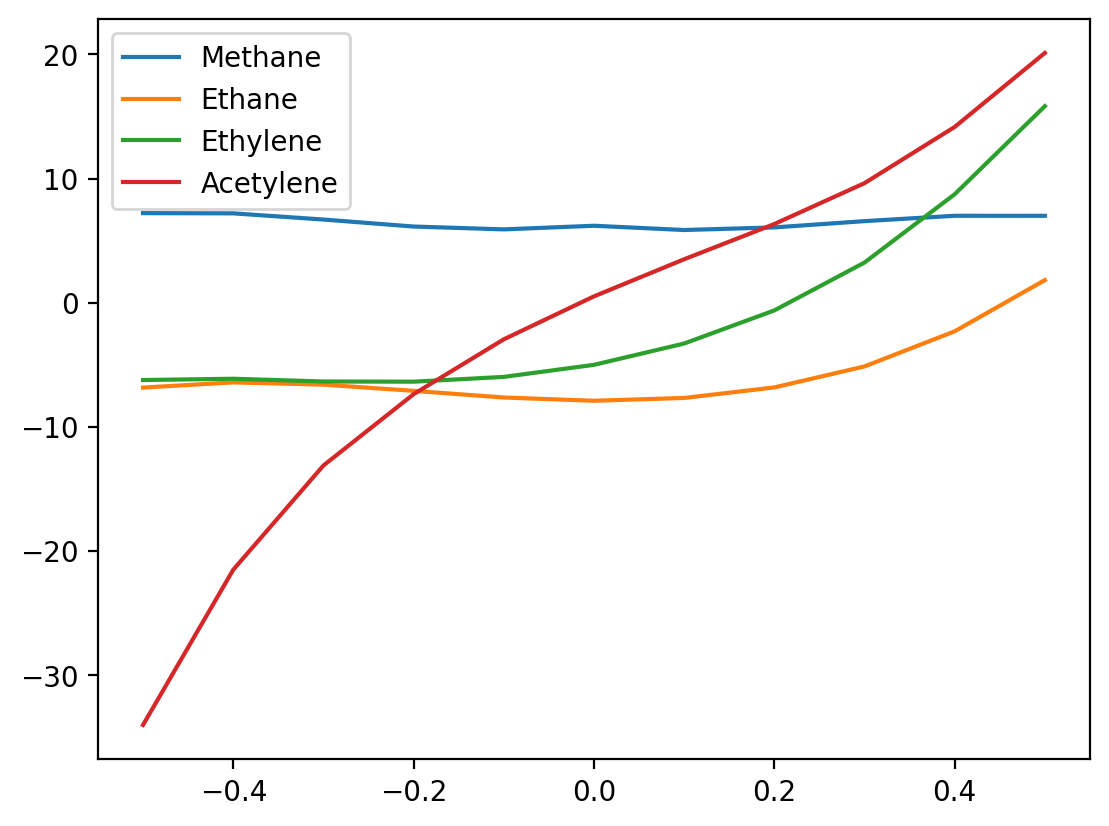

In [10]:
import matplotlib.pyplot as plt

for i_mol, mol in enumerate(molecular_list):
    plt.plot(distance_list, error_list[i_mol, :], label=mol)
plt.legend()

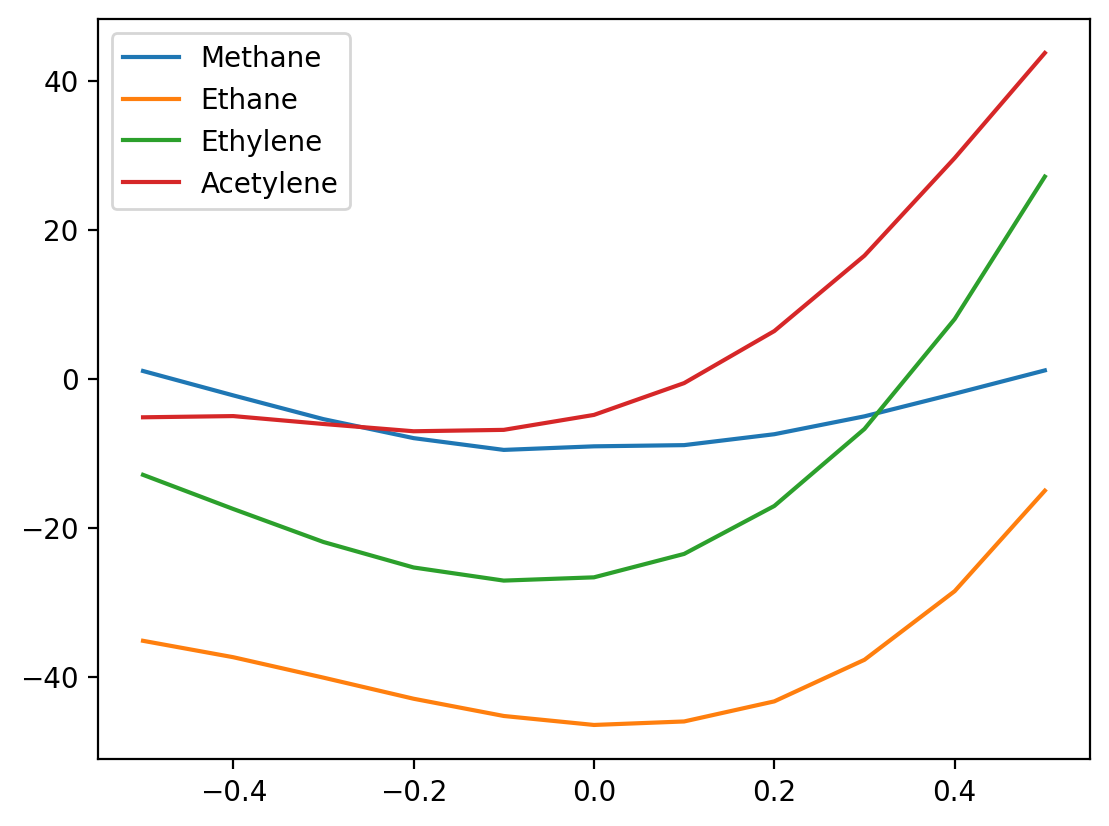

In [4]:
for (i_mol, mol) in enumerate(molecular_list):
    plt.plot(distance_list, error_list[i_mol, :], label=mol)
plt.legend()